In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

In [121]:
poweroverr = np.load("../data/poweroverr.npz")
poweroveromega = np.load("../data/poweroveromega.npz")
totalfield = np.load("../data/totalfield.npz")

poweroverrnorm = np.load("../data/poweroverrnorm.npz")
poweroveromeganorm = np.load("../data/poweroveromeganorm.npz")
totalfieldnorm = np.load("../data/totalfieldnorm.npz")

### 2 scatterers - total field

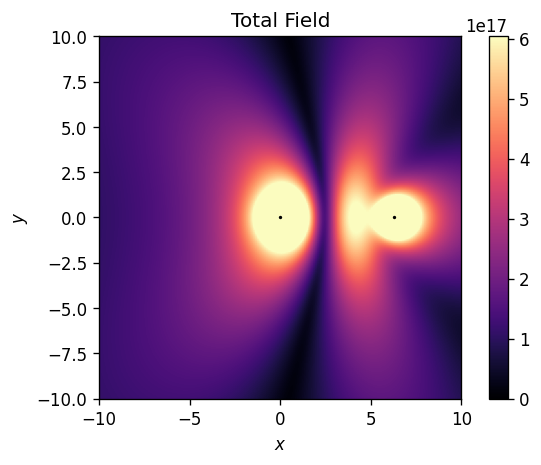

In [40]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfield.npz")["scattpos"]

xx = totalfield["xx"]
yy = totalfield["yy"]
phitot = totalfield["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()

### 2 scatterers - output power over r

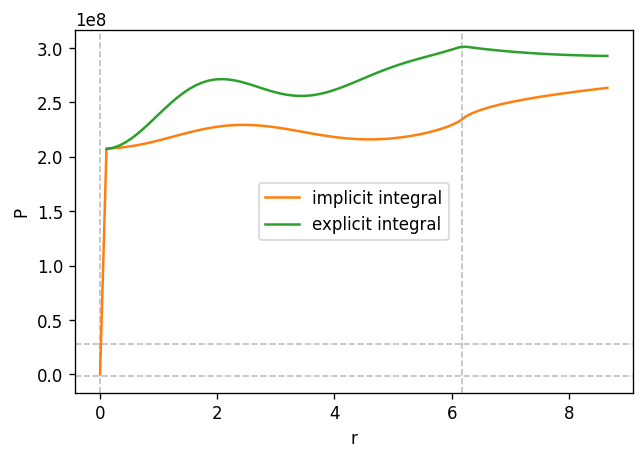

In [29]:
plt.figure(dpi=120)

scattpos = poweroverr["scattpos"]

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(-poweroverr["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(poweroverr["r"], poweroverr["P"], label="implicit integral", color="C1")
plt.plot(poweroverr["r"], poweroverr["Pexpl"], label="explicit integral", color="C2")

plt.xlabel("r")
plt.ylabel("P")
plt.legend()

### 2 scatterers - output power over omega - EP

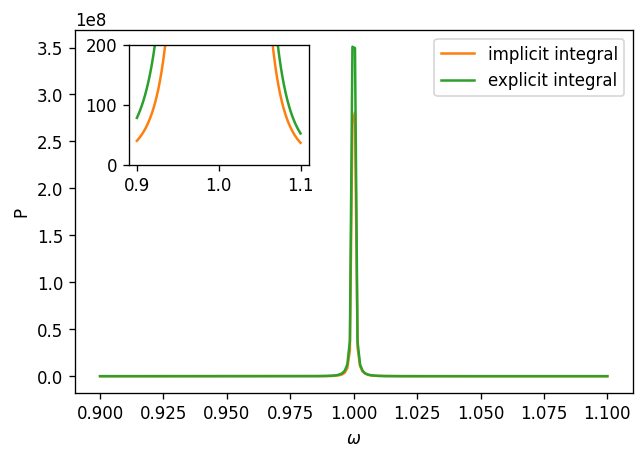

In [25]:
# here, the eigenvalues go to zero AND the eigenvectors coalesce

fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 200);

### 2 scatterers (normalized) - total field

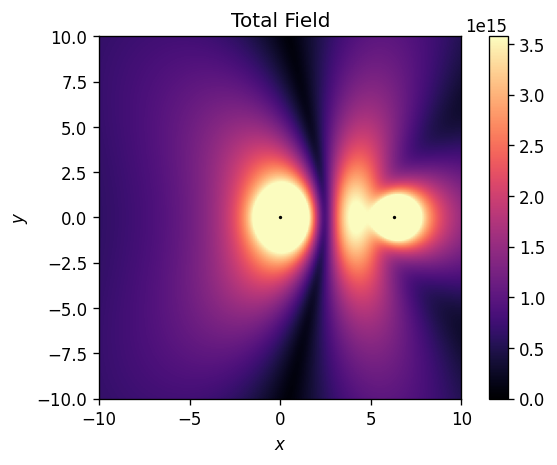

In [21]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfieldnorm.npz")["scattpos"]

xx = totalfieldnorm["xx"]
yy = totalfieldnorm["yy"]
phitot = totalfieldnorm["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total Field")

plt.show()

### 2 scatterers (normalized) - output power over r

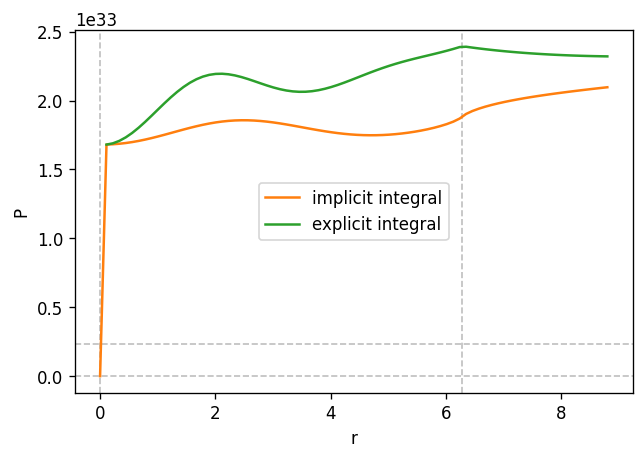

In [28]:
plt.figure(dpi=120)

scattpos = poweroverrnorm["scattpos"]

for i in range(scattpos.shape[0]):
    plt.axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    plt.axhline(-poweroverrnorm["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
plt.plot(poweroverrnorm["r"], poweroverrnorm["P"], label="implicit integral", color="C1")
plt.plot(poweroverrnorm["r"], poweroverrnorm["Pexpl"], label="explicit integral", color="C2")

plt.xlabel("r")
plt.ylabel("P")
plt.legend()

### 2 scatterers (normalized) - output power over omega - NO EP!

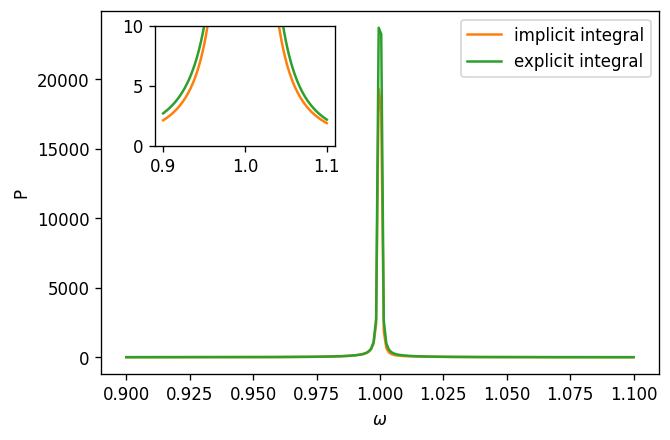

In [27]:
fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 10);

### 2 scatterers - total field - comparison

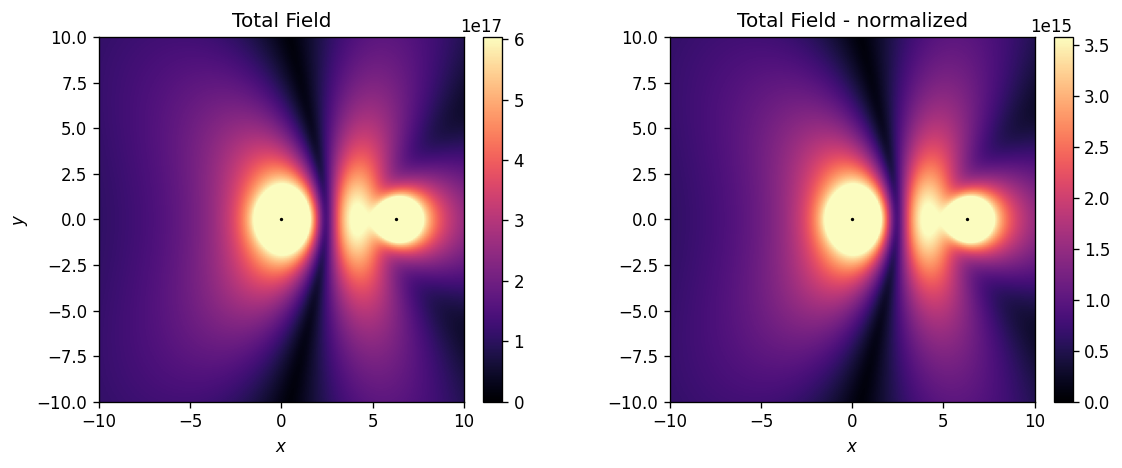

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
plt.gcf().set_facecolor("white") # set white background

scattpos = np.load("../data/totalfield.npz")["scattpos"]
xx = totalfield["xx"]
yy = totalfield["yy"]
phitot = totalfield["phitot"]
for i in range(scattpos.shape[0]):
    ax[0].scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
im0 = ax[0].imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
im0.set_clim(0, np.max(np.abs(phitot))/30)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")
ax[0].set_title("Total Field")

scattpos = np.load("../data/totalfieldnorm.npz")["scattpos"]
xx = totalfieldnorm["xx"]
yy = totalfieldnorm["yy"]
phitot = totalfieldnorm["phitot"]
for i in range(scattpos.shape[0]):
    ax[1].scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
im1 = ax[1].imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")
plt.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
im1.set_clim(0, np.max(np.abs(phitot))/30)
ax[1].set_xlabel("$x$")
ax[1].set_title("Total Field - normalized")

fig.tight_layout()
plt.show()

### 2 scatterers - output power over r - comparison

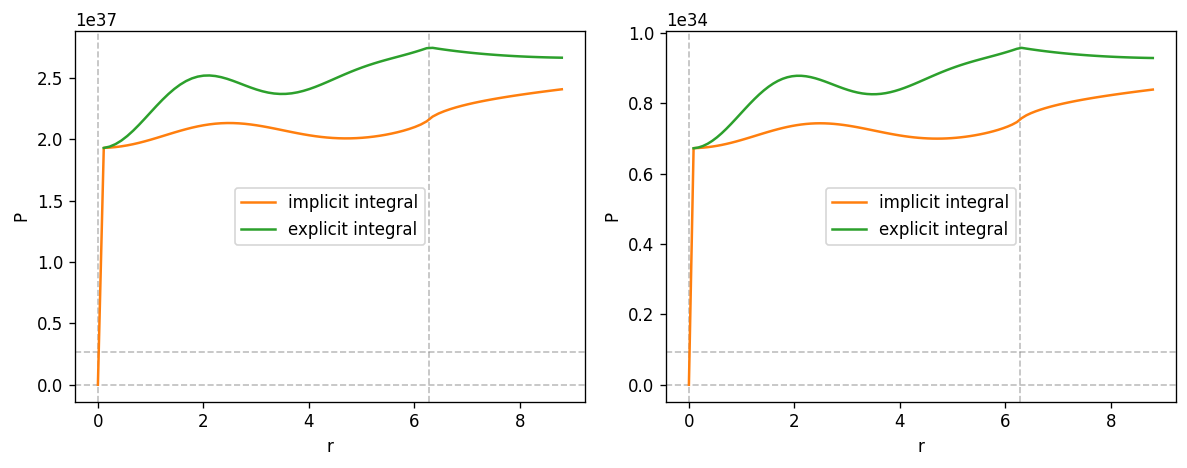

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

scattpos = poweroverr["scattpos"]
for i in range(scattpos.shape[0]):
    ax[0].axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    ax[0].axhline(-poweroverr["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
ax[0].plot(poweroverr["r"], poweroverr["P"], label="implicit integral", color="C1")
ax[0].plot(poweroverr["r"], poweroverr["Pexpl"], label="explicit integral", color="C2")
ax[0].set_xlabel("r")
ax[0].set_ylabel("P")
ax[0].legend()

scattpos = poweroverrnorm["scattpos"]
for i in range(scattpos.shape[0]):
    ax[1].axvline(la.norm(scattpos[i, :]), color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
    ax[1].axhline(-poweroverrnorm["analyticalsum"][i], color="gray", alpha=0.5, linewidth='1', linestyle='dashed')
ax[1].plot(poweroverrnorm["r"], poweroverrnorm["P"], label="implicit integral", color="C1")
ax[1].plot(poweroverrnorm["r"], poweroverrnorm["Pexpl"], label="explicit integral", color="C2")
ax[1].set_xlabel("r")
ax[1].set_ylabel("P")
ax[1].legend()

plt.tight_layout()
plt.show()

### 2 scatterers - output power over omega - comparison

/tmp/ipykernel_6146/670363987.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


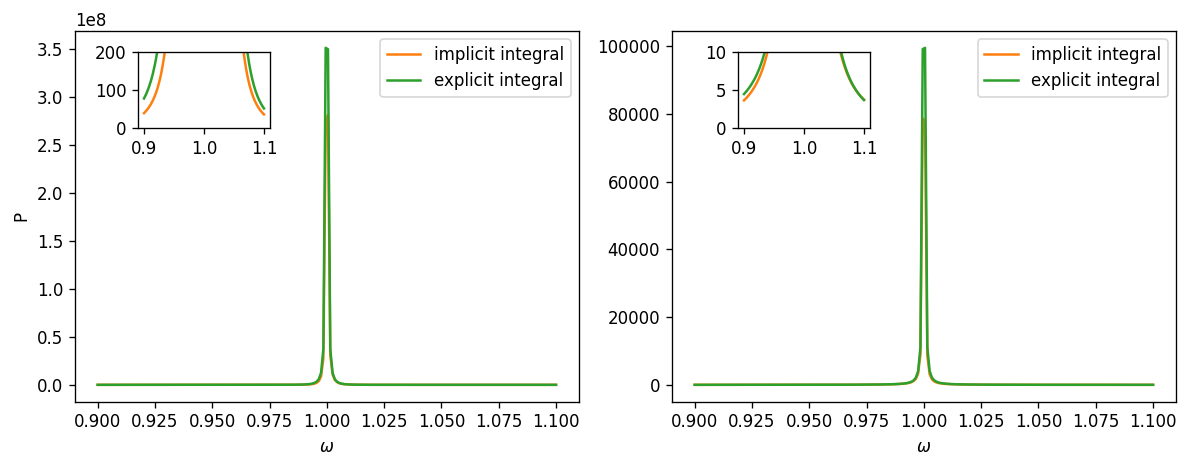

In [122]:
# this plots show the power over omega SKIPPING the exact point of divergence 

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=120)

ax[0].plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax[0].plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax[0].set_xlabel("$\\omega$")
ax[0].set_ylabel("P")
ax[0].legend()
ax_in = fig.add_axes([0.12, 0.72, 0.11, 0.16])
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 200)

ax[1].plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax[1].plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax[1].set_xlabel("$\\omega$")
ax[1].legend()
ax_in = fig.add_axes([0.62, 0.72, 0.11, 0.16])
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["P"], label="implicit integral", color="C1")
ax_in.plot(poweroveromeganorm["omega"], poweroveromeganorm["Pexpl"], label="explicit integral", color="C2")
ax_in.set_ylim(0, 10)

plt.tight_layout()
plt.show()